In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')  #制定画图风格
import warnings

warnings.filterwarnings('ignore')  #将警告过滤掉
%matplotlib inline


# 一：题目解读
## 1.1 数据读取

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2 字段解释
1. PassengerId: 乘客ID
2. Survived: 是否生存，0代表遇难，1代表还活着
3. Pclass: 船舱等级：1Upper，2Middle，3Lower
4. Name: 姓名
5. Sex: 性别
6. Age: 年龄
7. SibSp: 兄弟姐妹及配偶个数
8. Parch:父母或子女个数
9. Ticket: 乘客的船票号
10. Fare: 乘客的船票价
11. Cabin: 乘客所在的仓位（位置）
12. Embarked:乘客登船口岸



# 二：数据分析



## 2.1 数据整体情况
### 2.1.1 统计缺失值

In [3]:
data.isnull().sum()  #统计缺失值
# test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            143
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          536
Embarked         1
dtype: int64


### 2.1.2 查看数据统计数据

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,691.000000,691.000000,691.000000,548.000000,691.000000,691.000000,691.000000
mean,346.000000,0.387844,2.308249,29.921989,0.538350,0.387844,32.276103
std,199.618803,0.487612,0.835224,14.598391,1.076585,0.821855,48.447543
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,173.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,346.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,518.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,691.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



### 2.1.3 查看已知数据集的获救比例

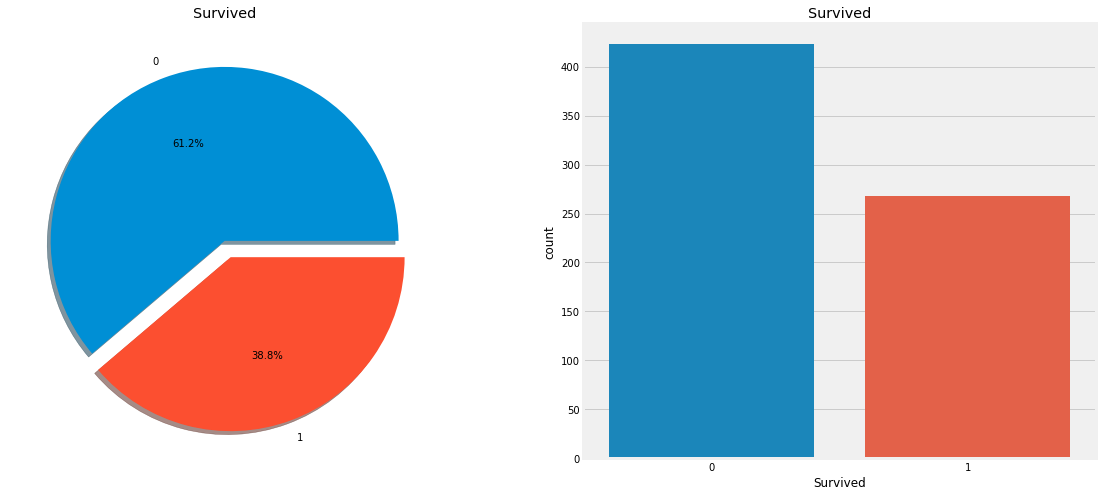

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 三：特征分析 & 缺失值填充
## 3.1 性别比例和性别获救情况
离散值：性别（男，女） 登船地点（S,Q,C）
连续值：年龄，船票价格

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()  #对性别进行分组，并计数

Sex     Survived
female  0            65
        1           184
male    0           358
        1            84
Name: Survived, dtype: int64

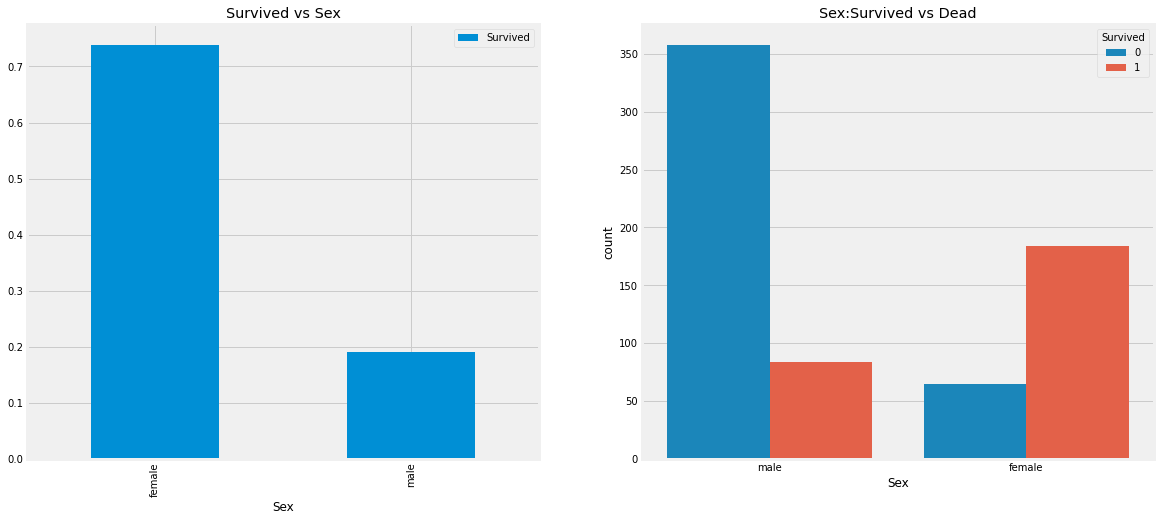

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## 3.2 Pclass --> 船舱等级跟获救情况的关系

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,65,102,167
2,73,71,144
3,285,95,380
All,423,268,691


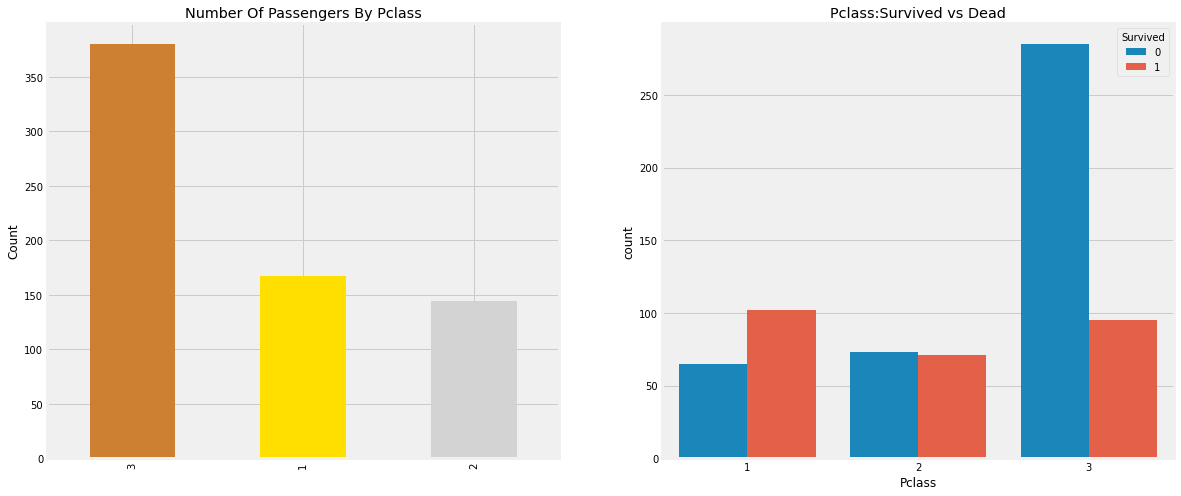

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

## 3.3 船舱等级和性别对结果的影响

In [10]:
pd.crosstab([data.Sex,data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

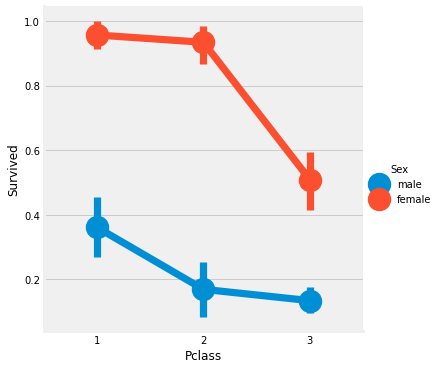

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

## 3.4 Age--> 连续值特征对结果的影响

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.75 Years
Average Age on the ship: 29.92198905109489 Years


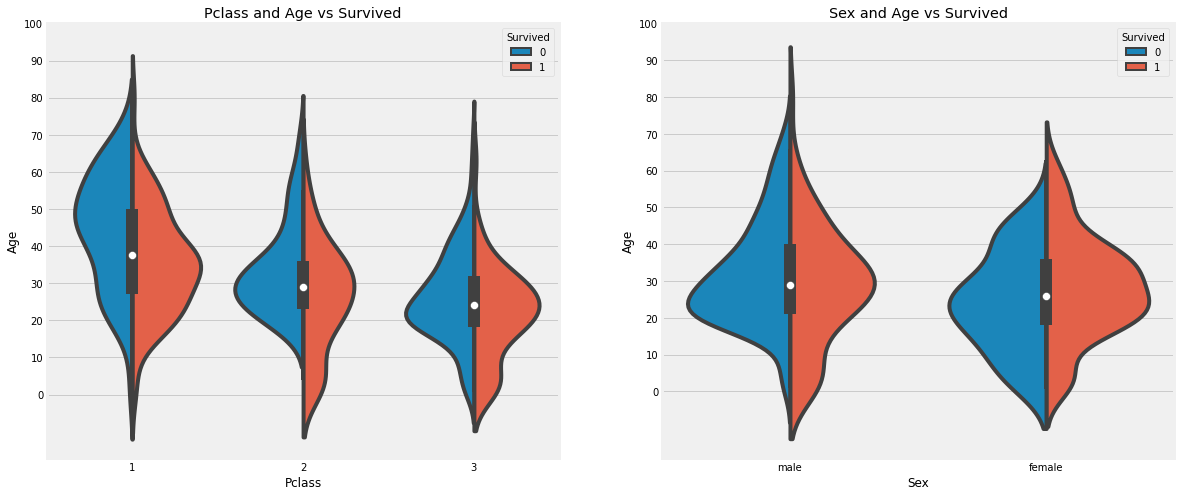

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## ***AGE缺省值填充

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')  #用性别核对姓名首字母

Initial,Col,Don,Dr,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,
female,0,0,0,1,0,0,151,1,1,0,94,1,0,0
male,1,1,5,0,2,27,0,0,0,401,0,0,4,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.groupby('Initial')['Age'].mean()

Initial
Master     4.822917
Miss      22.280488
Mr        33.123028
Mrs       35.202532
Other     52.000000
Name: Age, dtype: float64

 填充缺失值

In [16]:
## 使用每组的均值来进行填充
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 35
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 52
data.Age.isnull().any()  #看看填充完了咋样



False

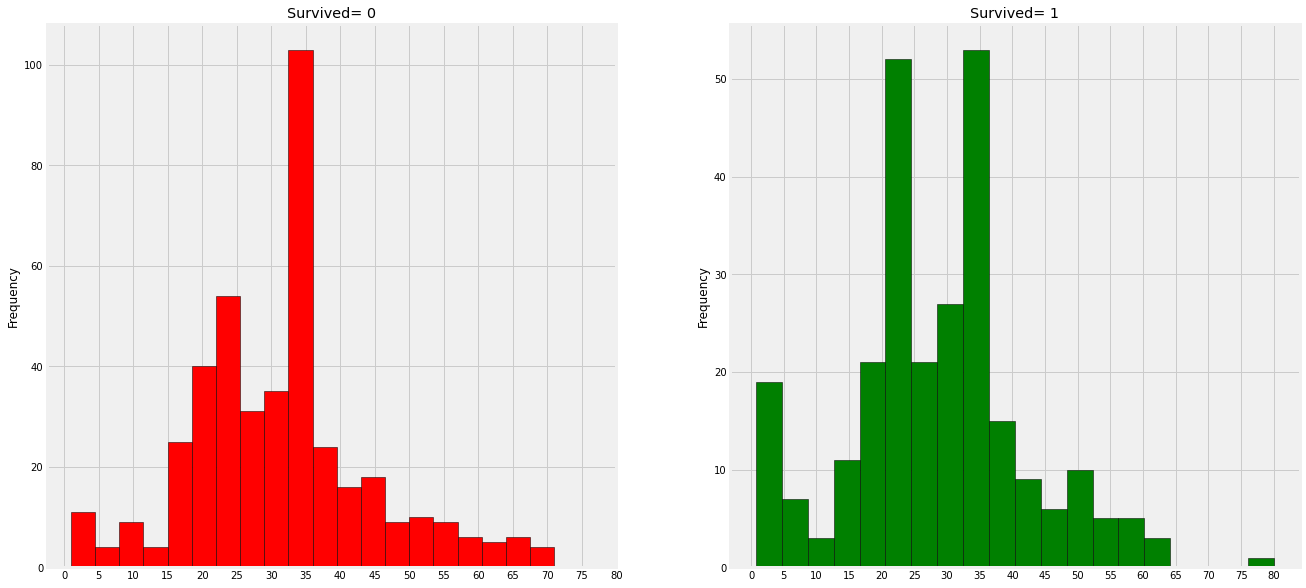

In [17]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

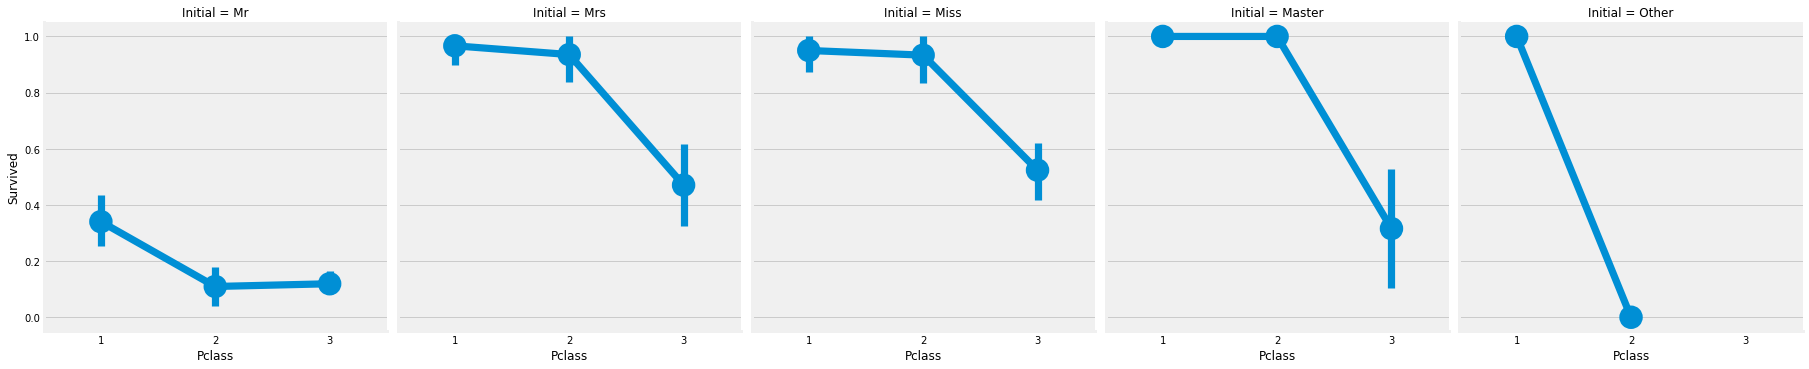

In [18]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

## 3.5 Embarked--> 登船地点

In [19]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(
    cmap='summer_r')

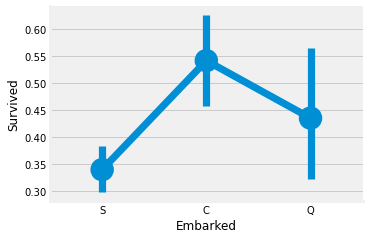

In [20]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

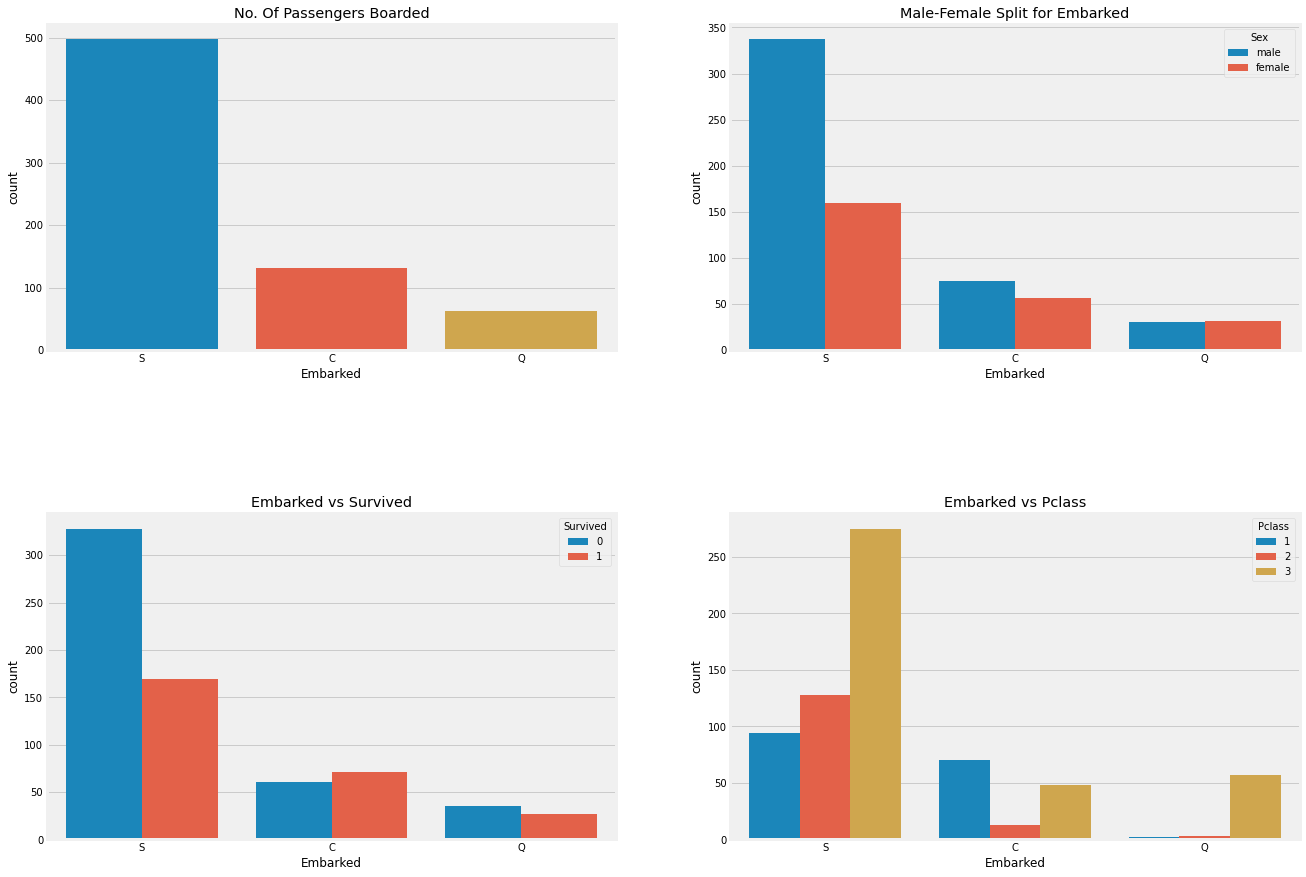

In [21]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

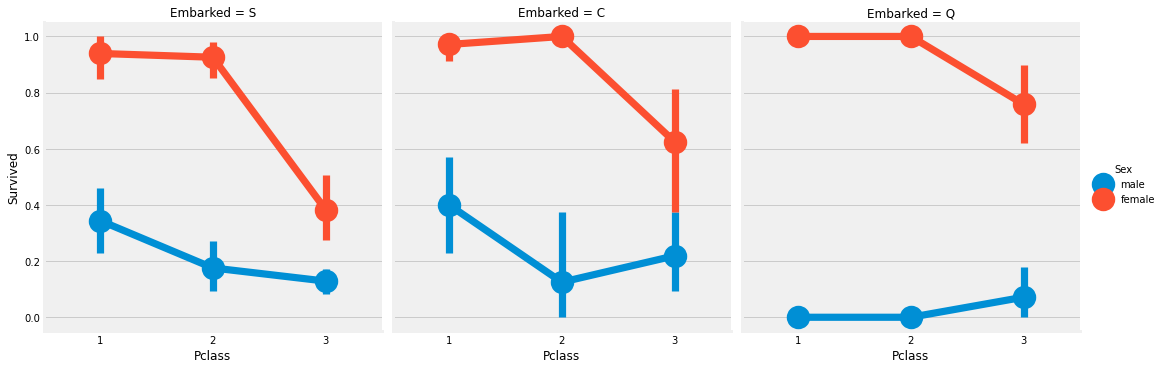

In [22]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [23]:
data['Embarked'].fillna('S', inplace=True)
data.Embarked.isnull().any()

False

## 3.6 sibsip -->兄弟姐妹的数量

In [24]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,300,163
1,78,87
2,14,12
3,11,3
4,11,3
5,5,0
8,4,0


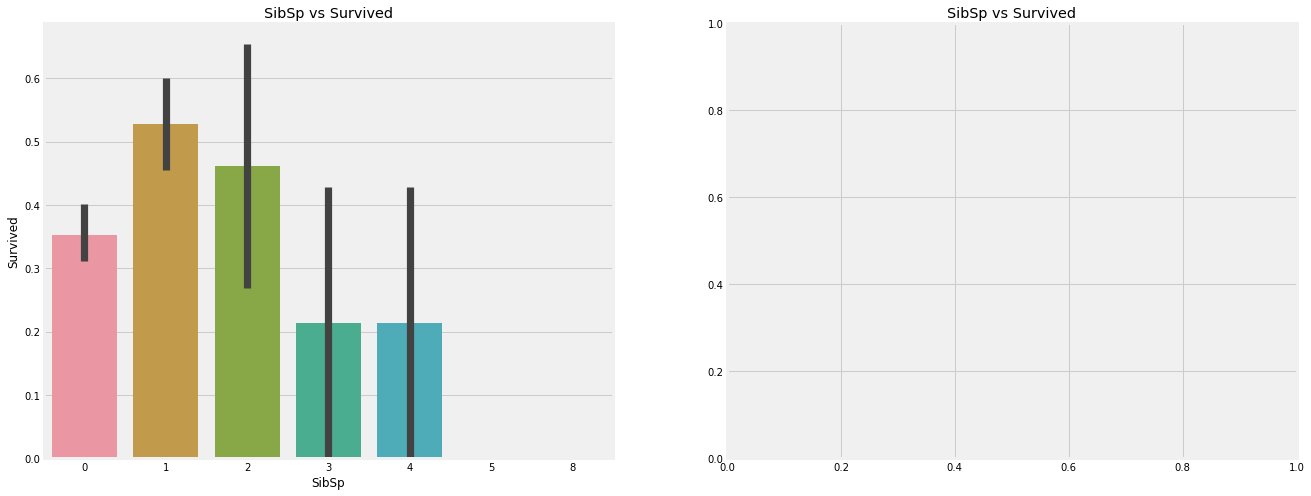

In [25]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

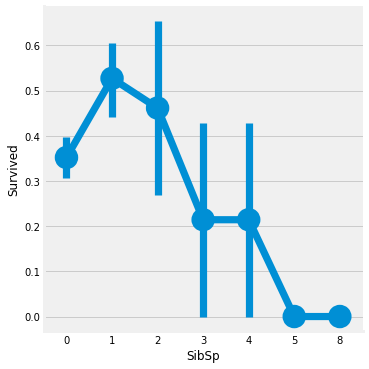

In [26]:
# ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
# ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [27]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,106,93,264
1,54,43,68
2,4,8,14
3,3,0,11
4,0,0,14
5,0,0,5
8,0,0,4


## 3.7 Parch --> 父母和孩子的数量

In [28]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,126,105,295
1,22,24,42
2,18,14,34
3,0,1,1
4,1,0,3
5,0,0,4
6,0,0,1


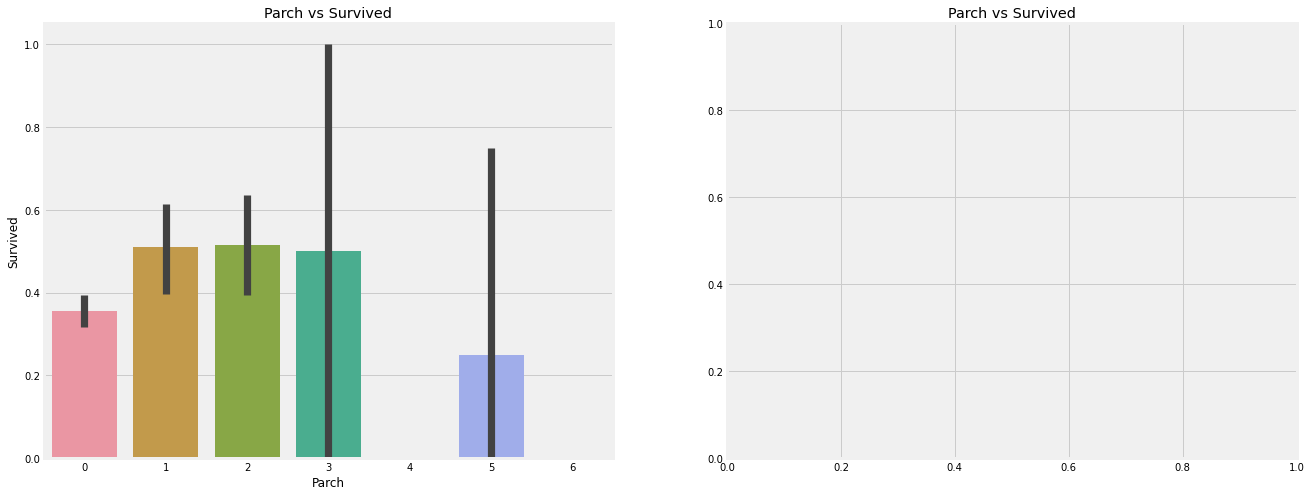

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

## 3.8 Fare--> 船票的价格

In [30]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.276102749638184


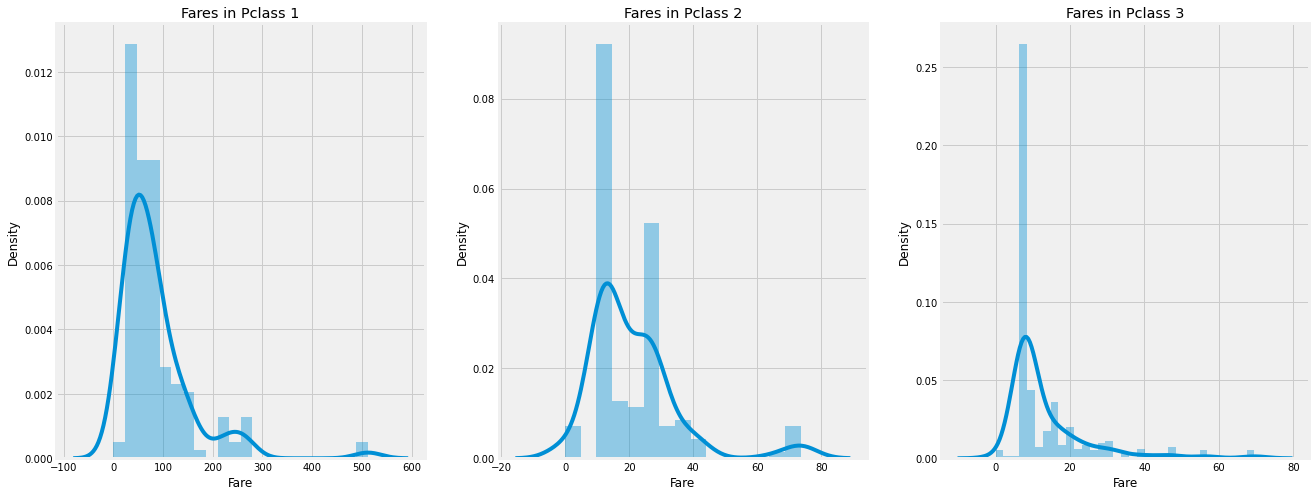

In [31]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

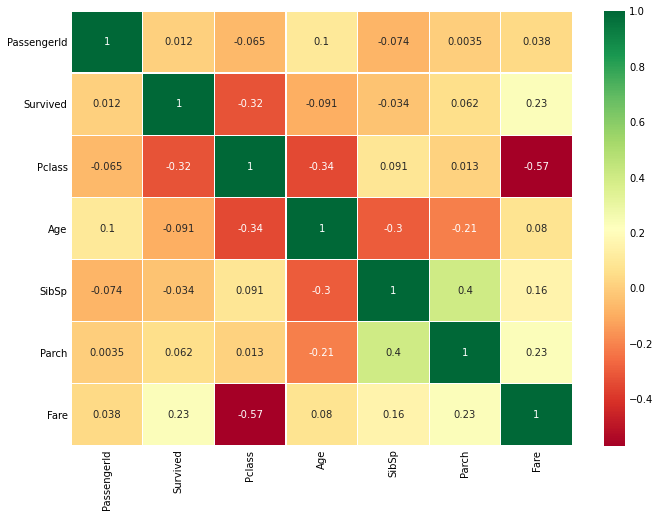

In [32]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)  #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# 四：特征工程

## 4.1 年龄特征：


In [33]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [34]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')  #检查每个波段的密码

,Age_band
1,298
2,252
0,76
3,56
4,9


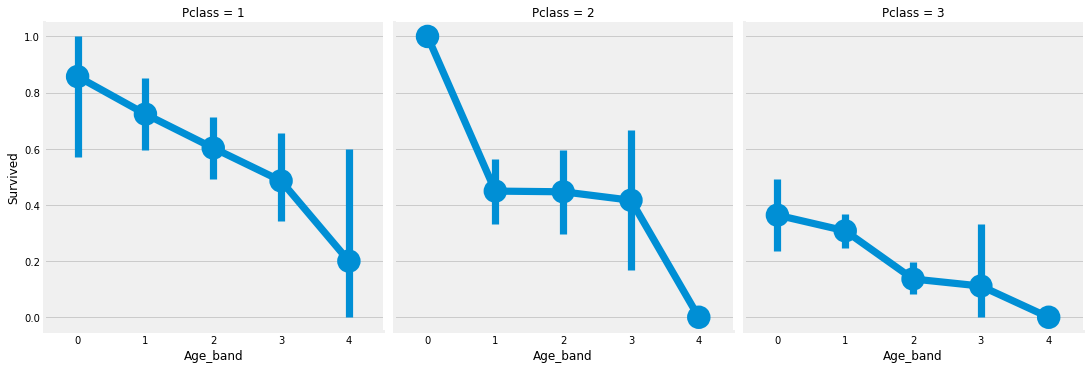

In [35]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

## 4.2 Family_size：家庭总人数

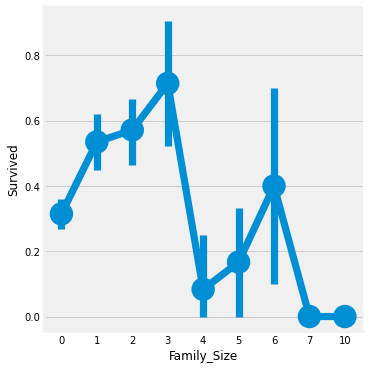

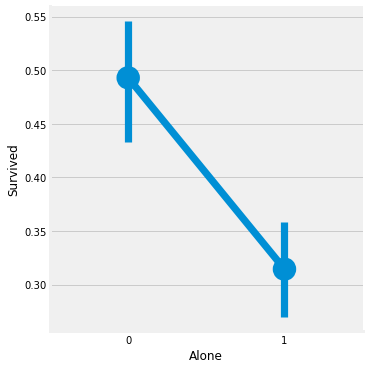

In [36]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']  #family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1  #Alone

# f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
# ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
# ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
plt.show()

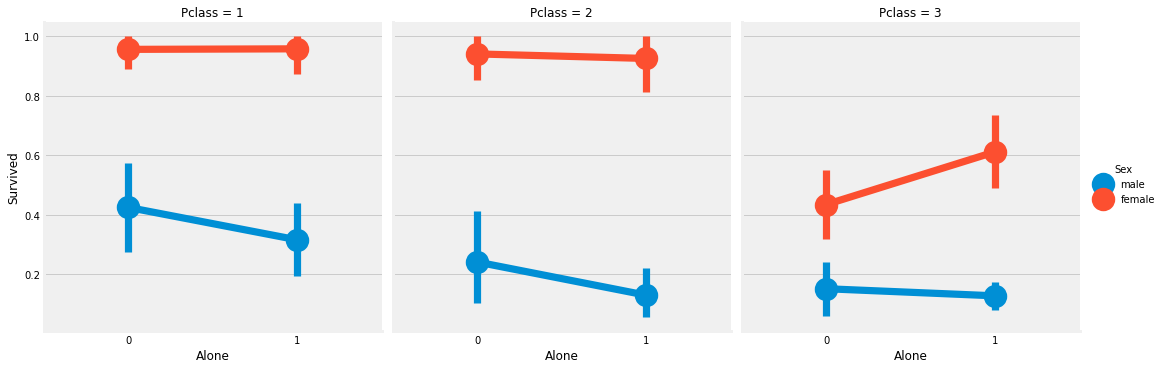

In [37]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

## 4.3 船票价格

In [38]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.925]",0.237569
"(7.925, 15.0]",0.278788
"(15.0, 31.275]",0.454023
"(31.275, 512.329]",0.584795


In [39]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.925, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.925) & (data['Fare'] <= 15.0), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 15.0) & (data['Fare'] <= 31.275), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.275) & (data['Fare'] <= 512.329), 'Fare_cat'] = 3

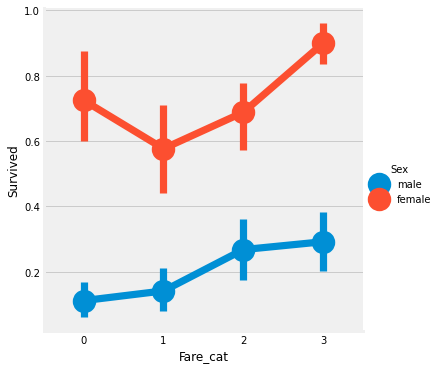

In [40]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

## 4.4 性别、登船地点、称谓特征

In [41]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

# 五：数据清洗

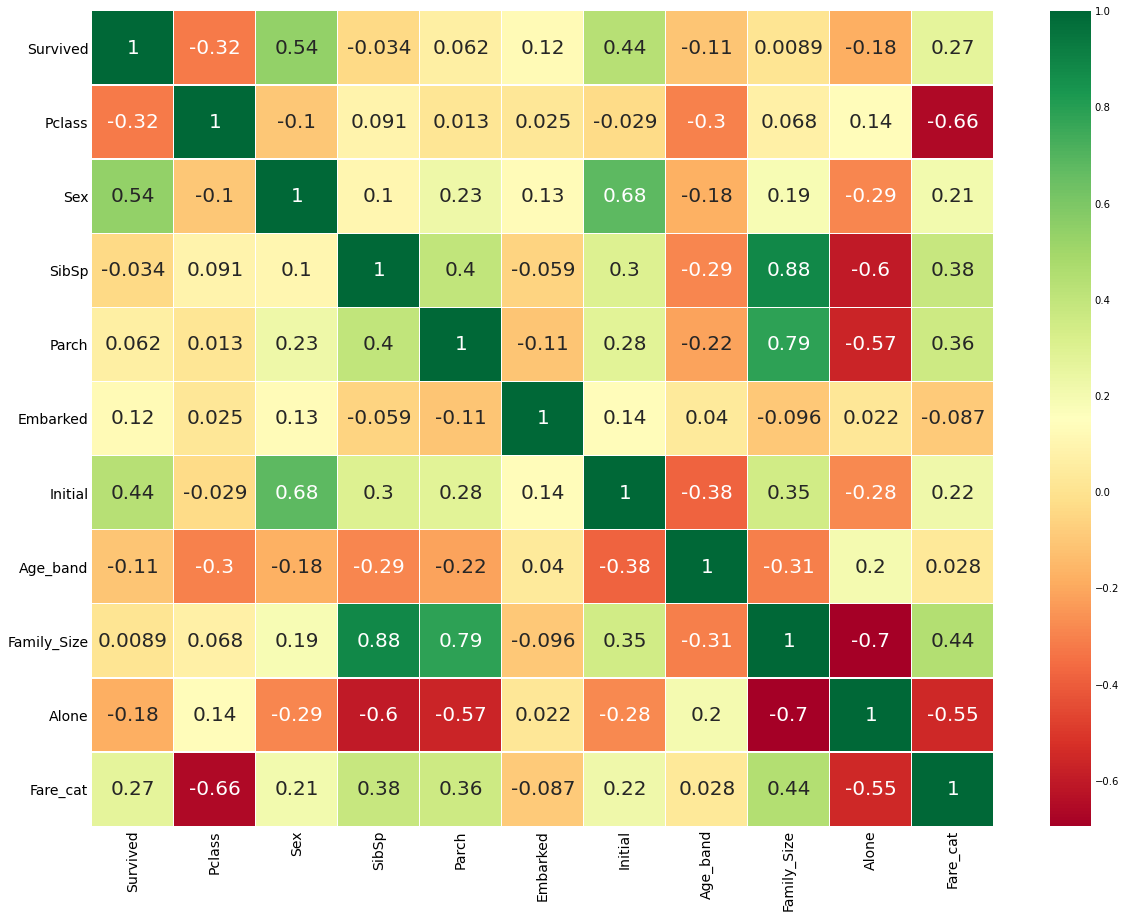

In [42]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 五.机器学习建模
## 1. 导入机器学习库

In [43]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression  #逻辑回归
from sklearn import svm  #支持向量机（线性和径向）
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.neighbors import KNeighborsClassifier  #k-近邻
from sklearn.naive_bayes import GaussianNB  #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier  #决策树
from sklearn.model_selection import train_test_split  #神经网络
from sklearn import metrics  #精度
from sklearn.metrics import confusion_matrix  #for confusion matrix

## 2. 测试集数据处理

In [44]:
test_data = pd.read_csv('data/test.csv',header=None,names=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
test_data.head()

test_data['Initial'] = 0
for i in test_data:
    test_data['Initial'] = test_data.Name.str.extract('([A-Za-z]+)\.')

test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

## 使用每组的均值来进行填充
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == 'Mr'), 'Age'] = 33
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == 'Mrs'), 'Age'] = 35
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == 'Master'), 'Age'] = 5
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == 'Miss'), 'Age'] = 22
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == 'Other'), 'Age'] = 52
test_data.Age.isnull().any()  #看看填充完了咋样

test_data['Embarked'].fillna('S', inplace=True)


test_data['Age_band'] = 0
test_data.loc[test_data['Age'] <= 16, 'Age_band'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age_band'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age_band'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age_band'] = 3
test_data.loc[test_data['Age'] > 64, 'Age_band'] = 4
test_data.head(2)


test_data['Family_Size'] = 0
test_data['Family_Size'] = test_data['Parch'] + test_data['SibSp']  #family size
test_data['Alone'] = 0
test_data.loc[test_data.Family_Size == 0, 'Alone'] = 1  #Alone

test_data['Fare_Range'] = pd.qcut(test_data['Fare'], 4)

test_data['Fare_cat'] = 0
test_data.loc[test_data['Fare'] <= 7.925, 'Fare_cat'] = 0
test_data.loc[(test_data['Fare'] > 7.925) & (test_data['Fare'] <= 15.0), 'Fare_cat'] = 1
test_data.loc[(test_data['Fare'] > 15.0) & (test_data['Fare'] <= 31.275), 'Fare_cat'] = 2
test_data.loc[(test_data['Fare'] > 31.275) & (test_data['Fare'] <= 512.329), 'Fare_cat'] = 3

test_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
test_data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

test_data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

## 3. 切分训练集与测试集

In [45]:
train_X = data[data.columns[1:]]
train_Y = data[data.columns[:1]]
test_X = test_data[test_data.columns[1:]]
test_Y = test_data[test_data.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## 4. 逻辑回归

In [80]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Logistic Regression is 0.825


## 5. Gradient Boosting Classifier模型

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy of the GradientBoostingClassifier is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the GradientBoostingClassifier is 0.855


# 七：模型评估

The accuracy-score of the Logistic Regression is 0.825
The recall-score of the Logistic Regression is 0.7671232876712328
The f1-score of the Logistic Regression is 0.761904761904762
The accuracy-score of the GradientBoostingClassifier is 0.855
The recall-score of the GradientBoostingClassifier is 0.8461538461538461
The f1-score of the GradientBoostingClassifier is 0.7913669064748202


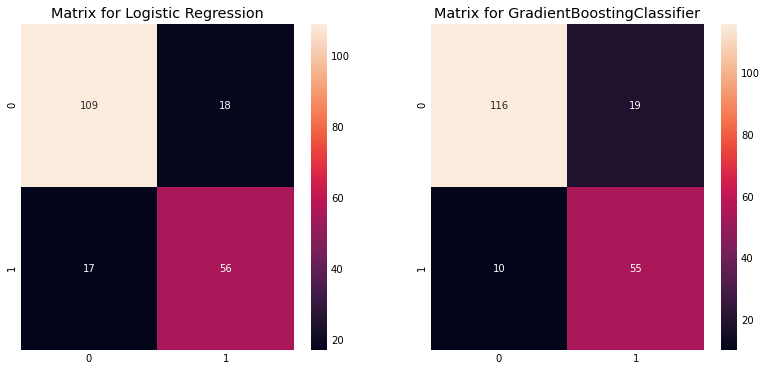

In [62]:
from sklearn.model_selection import cross_val_predict #prediction
f,ax=plt.subplots(1,2,figsize=(12,6))
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
sns.heatmap(confusion_matrix(prediction1,test_Y),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for Logistic Regression')
print('The accuracy-score of the Logistic Regression is', metrics.accuracy_score(prediction1, test_Y))
print('The recall-score of the Logistic Regression is', metrics.recall_score(prediction1, test_Y))
print('The f1-score of the Logistic Regression is', metrics.f1_score(prediction1,test_Y))



model = GradientBoostingClassifier()
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
sns.heatmap(confusion_matrix(prediction2,test_Y),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Matrix for GradientBoostingClassifier')
print('The accuracy-score of the GradientBoostingClassifier is', metrics.accuracy_score(prediction2, test_Y))
print('The recall-score of the GradientBoostingClassifier is', metrics.recall_score(prediction2, test_Y))
print('The f1-score of the GradientBoostingClassifier is', metrics.f1_score(prediction2,test_Y))

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()